In [1]:
import os
import tensorflow as tf 
from tensorflow.python.client import device_lib

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('crabdataset.csv')

In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd


# Feature와 Target 분리
X = df.iloc[:,:-2]
y = df.iloc[:,-2:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler_st = StandardScaler() # X의 scaler 지정
scaler_st.fit(X_train)
X_train_st = scaler_st.transform(X_train) # standard scaler로 X_train scale 한 것을 X_train_st 에 배정
X_test_st = scaler_st.transform(X_test) # standard scaler로 X_test scale 한 것을 X_test_st 에 배정

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dropout, BatchNormalization

# ANN 모델 구성
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train_st.shape[1]))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2))


# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')
# EarlyStopping 설정: 10번 연속으로 검증 손실이 향상되지 않으면 학습 종료
early_stop = EarlyStopping(monitor='val_loss', patience=300)

# ModelCheckpoint 설정: 각 에포크마다 검증 손실이 이전보다 좋아졌을 경우 모델 저장
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# 모델 학습 시 Callback 추가
history =model.fit(X_train_st, y_train, validation_data=(X_test_st, y_test), epochs=2000, batch_size=16, callbacks=[early_stop, model_checkpoint])

# 훈련 데이터에 대한 예측 및 성능 평가
y_train_hat = model.predict(X_train_st)


# 테스트 데이터에 대한 예측 및 성능 평가
y_test_hat = model.predict(X_test_st)



mae_train = mean_absolute_error(y_train, y_train_hat)
mae_test = mean_absolute_error(y_test, y_test_hat)

mse_train = mean_squared_error(y_train, y_train_hat)
mse_test = mean_squared_error(y_test, y_test_hat)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

train_r2 = r2_score(y_train, y_train_hat)
test_r2 = r2_score(y_test, y_test_hat)

print("MAE for model is train : ",mae_train, "Test:", mae_test)
print("MSE for model is train : ",mse_train, "Test:",mse_test)
print("RMSE for model is train : ",rmse_train, "Test:",rmse_test)
print("R square for model is train : ",train_r2, "Test:",test_r2)

Epoch 1/2000
194/194 [==============================] - 1s 4ms/step - loss: 84.7978 - val_loss: 75.4270
Epoch 2/2000
194/194 [==============================] - 1s 3ms/step - loss: 69.1630 - val_loss: 54.5105
Epoch 3/2000
194/194 [==============================] - 1s 3ms/step - loss: 49.0242 - val_loss: 36.7255
Epoch 4/2000
194/194 [==============================] - 1s 3ms/step - loss: 31.2036 - val_loss: 23.2516
Epoch 5/2000
194/194 [==============================] - 1s 3ms/step - loss: 18.9649 - val_loss: 12.2737
Epoch 6/2000
194/194 [==============================] - 1s 3ms/step - loss: 11.2084 - val_loss: 6.8868
Epoch 7/2000
194/194 [==============================] - 1s 3ms/step - loss: 7.0457 - val_loss: 3.1869
Epoch 8/2000
194/194 [==============================] - 1s 4ms/step - loss: 5.0769 - val_loss: 2.1539
Epoch 9/2000
194/194 [==============================] - 1s 3ms/step - loss: 4.3582 - val_loss: 1.5910
Epoch 10/2000
194/194 [==============================] - 1s 3ms/step - 

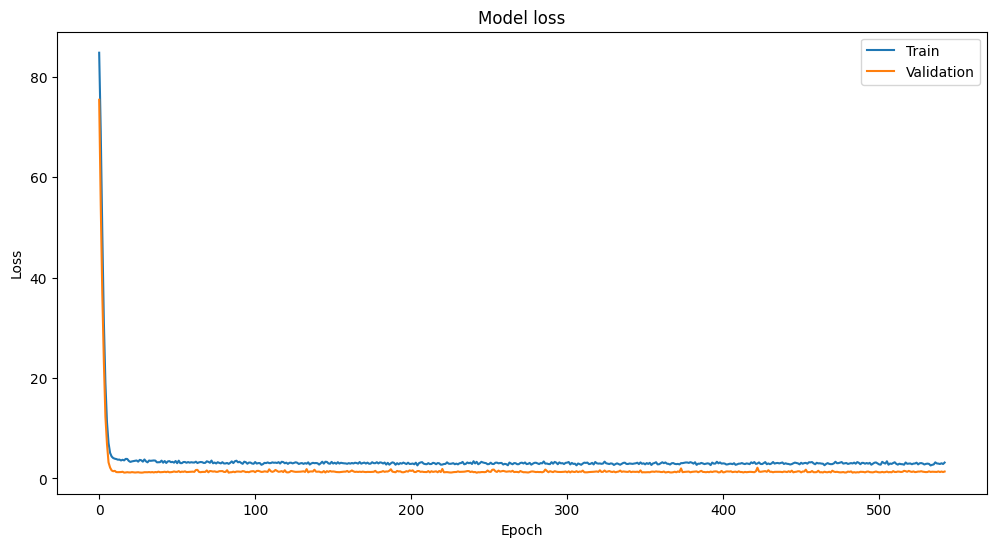

In [12]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Shucked Weight에 대한 오차 계산
mae_train_shucked = mean_absolute_error(y_train['Shucked Weight'], y_train_hat[:, 0])
mse_train_shucked = mean_squared_error(y_train['Shucked Weight'], y_train_hat[:, 0])
rmse_train_shucked = sqrt(mse_train_shucked)
r2_train_shucked = r2_score(y_train['Shucked Weight'], y_train_hat[:, 0])

mae_test_shucked = mean_absolute_error(y_test['Shucked Weight'], y_test_hat[:, 0])
mse_test_shucked = mean_squared_error(y_test['Shucked Weight'], y_test_hat[:, 0])
rmse_test_shucked = sqrt(mse_test_shucked)
r2_test_shucked = r2_score(y_test['Shucked Weight'], y_test_hat[:, 0])

# Viscera Weight에 대한 오차 계산
mae_train_viscera = mean_absolute_error(y_train['Viscera Weight'], y_train_hat[:, 1])
mse_train_viscera = mean_squared_error(y_train['Viscera Weight'], y_train_hat[:, 1])
rmse_train_viscera = sqrt(mse_train_viscera)
r2_train_viscera = r2_score(y_train['Viscera Weight'], y_train_hat[:, 1])

mae_test_viscera = mean_absolute_error(y_test['Viscera Weight'], y_test_hat[:, 1])
mse_test_viscera = mean_squared_error(y_test['Viscera Weight'], y_test_hat[:, 1])
rmse_test_viscera = sqrt(mse_test_viscera)
r2_test_viscera = r2_score(y_test['Viscera Weight'], y_test_hat[:, 1])

# 결과 출력
print("Shucked Weight - Training data: MAE = {}, MSE = {}, RMSE = {}, R2 = {}".format(mae_train_shucked, mse_train_shucked, rmse_train_shucked, r2_train_shucked))
print("Shucked Weight - Test data: MAE = {}, MSE = {}, RMSE = {}, R2 = {}".format(mae_test_shucked, mse_test_shucked, rmse_test_shucked, r2_test_shucked))
print("Viscera Weight - Training data: MAE = {}, MSE = {}, RMSE = {}, R2 = {}".format(mae_train_viscera, mse_train_viscera, rmse_train_viscera, r2_train_viscera))
print("Viscera Weight - Test data: MAE = {}, MSE = {}, RMSE = {}, R2 = {}".format(mae_test_viscera, mse_test_viscera, rmse_test_viscera, r2_test_viscera))

Shucked Weight - Training data: MAE = 0.8395546367136293, MSE = 1.618677028145936, RMSE = 1.2722723875593371, R2 = 0.957809219929069
Shucked Weight - Test data: MAE = 0.8868081406737162, MSE = 1.7944461455480316, RMSE = 1.3395693881050104, R2 = 0.9581891053448562
Viscera Weight - Training data: MAE = 0.5770644372115237, MSE = 0.7240417765278415, RMSE = 0.8509064440511903, R2 = 0.9236394488420717
Viscera Weight - Test data: MAE = 0.5567035050840574, MSE = 0.602418312357007, RMSE = 0.7761561133927936, R2 = 0.9402507390843422


In [9]:
import matplotlib.pyplot as plt

In [36]:
# 전체에 대한 잔차 계산
residuals_train = y_train.values - y_train_hat
residuals_test = y_test.values - y_test_hat

# 각각에 대한 잔차 계산
residuals_train_shucked = y_train['Shucked Weight'].values - y_train_hat[:, 0]
residuals_test_shucked = y_test['Shucked Weight'].values - y_test_hat[:, 0]

residuals_train_viscera = y_train['Viscera Weight'].values - y_train_hat[:, 1]
residuals_test_viscera = y_test['Viscera Weight'].values - y_test_hat[:, 1]

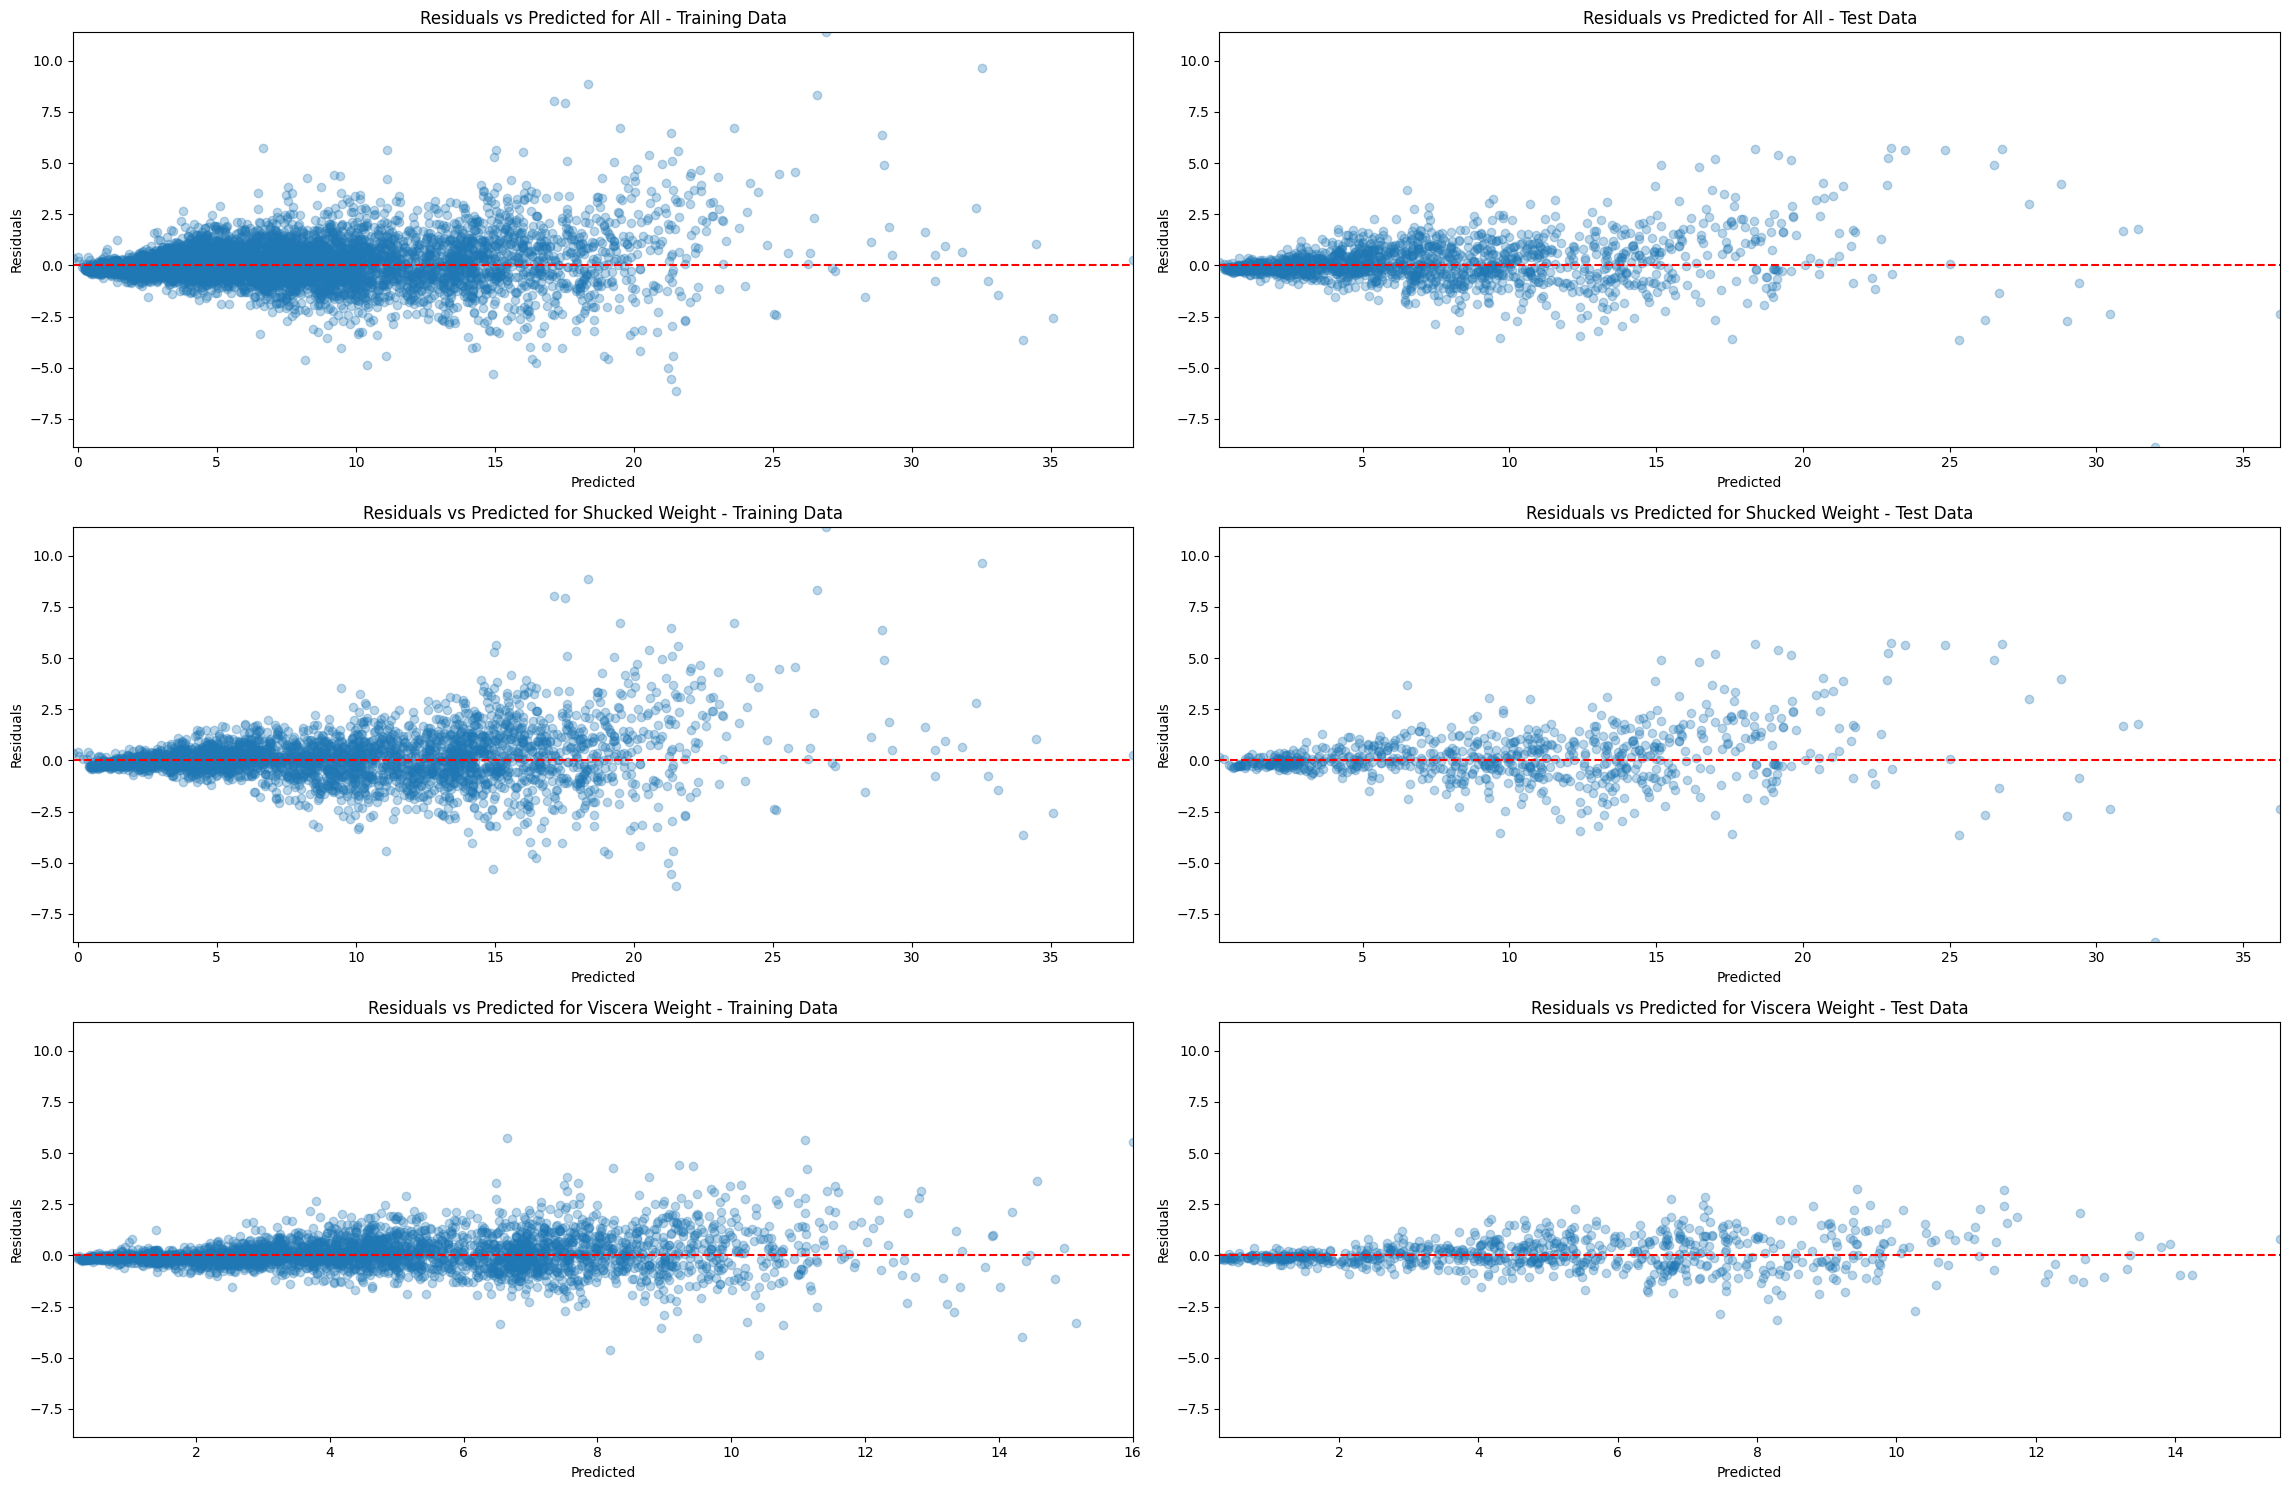

In [37]:
fig, axes = plt.subplots(3, 2, figsize=(23, 15))

# 잔차의 최소값과 최대값 계산
residuals_min = np.min([residuals_train.min(), residuals_test.min()])
residuals_max = np.max([residuals_train.max(), residuals_test.max()])

# 전체에 대한 잔차 산점도
axes[0, 0].scatter(y_train_hat, residuals_train, alpha=0.3)
axes[0, 0].axhline(0, color='r', linestyle='--')
axes[0, 0].set_xlim([y_train_hat.min(), y_train_hat.max()])
axes[0, 0].set_ylim([residuals_min, residuals_max])
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Predicted for All - Training Data')



axes[0, 1].scatter(y_test_hat, residuals_test, alpha=0.3)
axes[0, 1].axhline(0, color='r', linestyle='--')
axes[0, 1].set_xlim([y_test_hat.min(), y_test_hat.max()])
axes[0, 1].set_ylim([residuals_min, residuals_max])
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residuals vs Predicted for All - Test Data')


# Shucked Weight에 대한 잔차 산점도
axes[1, 0].scatter(y_train_hat[:, 0], residuals_train_shucked, alpha=0.3)
axes[1, 0].axhline(0, color='r', linestyle='--')
axes[1, 0].set_xlim([y_train_hat[:, 0].min(), y_train_hat[:, 0].max()])
axes[1, 0].set_ylim([residuals_min, residuals_max])
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals vs Predicted for Shucked Weight - Training Data')

axes[1, 1].scatter(y_test_hat[:, 0], residuals_test_shucked, alpha=0.3)
axes[1, 1].axhline(0, color='r', linestyle='--')
axes[1, 1].set_xlim([y_test_hat[:, 0].min(), y_test_hat[:, 0].max()])
axes[1, 1].set_ylim([residuals_min, residuals_max])
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs Predicted for Shucked Weight - Test Data')


# Viscera Weight에 대한 잔차 산점도
axes[2, 0].scatter(y_train_hat[:, 1], residuals_train_viscera, alpha=0.3)
axes[2, 0].axhline(0, color='r', linestyle='--')
axes[2, 0].set_xlim([y_train_hat[:, 1].min(), y_train_hat[:, 1].max()])
axes[2, 0].set_ylim([residuals_min, residuals_max])
axes[2, 0].set_xlabel('Predicted')
axes[2, 0].set_ylabel('Residuals')
axes[2, 0].set_title('Residuals vs Predicted for Viscera Weight - Training Data')

axes[2, 1].scatter(y_test_hat[:, 1], residuals_test_viscera, alpha=0.3)
axes[2, 1].axhline(0, color='r', linestyle='--')
axes[2, 1].set_xlim([y_test_hat[:, 1].min(), y_test_hat[:, 1].max()])
axes[2, 1].set_ylim([residuals_min, residuals_max])
axes[2, 1].set_xlabel('Predicted')
axes[2, 1].set_ylabel('Residuals')
axes[2, 1].set_title('Residuals vs Predicted for Viscera Weight - Test Data')

plt.tight_layout()
plt.show()

In [38]:
import tensorflow.keras.utils as keras_utils

# Visualize the model architecture
keras_utils.plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [40]:
from tensorflow.keras.utils import plot_model

In [41]:
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
